Task 10: Data Splitting, Training of modules
→ This is the core training phase, where data is split into training and testing sets, and the model is trained using the training set.

Task 11: Cross Validation and Evaluation of the model
→ This is part of the model evaluation phase, which often happens during and after training to assess the model’s performance and generalizability.

Task 6: Evaluate the impact of the new features on model performance
→ This involves training models with and without the engineered features to see how they affect performance.



Model Performance (Test Set):

LinearRegression: RMSE = 3.61, R2 = 0.817
RandomForest: RMSE = 1.89, R2 = 0.949
Ridge: RMSE = 3.60, R2 = 0.817
Lasso: RMSE = 3.68, R2 = 0.810
XGBoost: RMSE = 2.12, R2 = 0.937


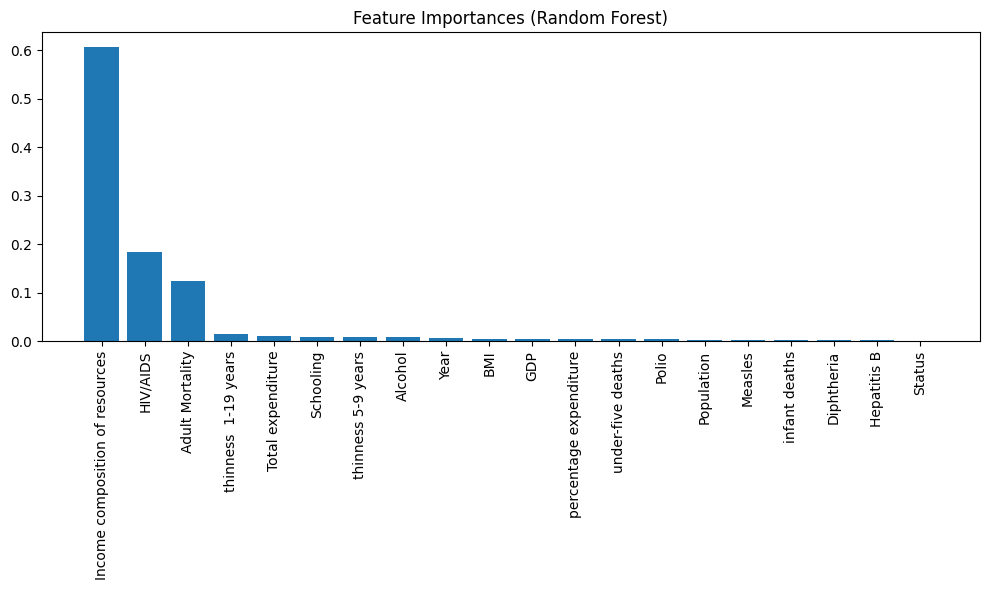


Random Forest model and scaler saved as 'life_expectancy_rf.pkl' and 'life_expectancy_scaler.pkl'.


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Optional: Gradient Boosting (XGBoost)
try:
    from xgboost import XGBRegressor
    xgb_installed = True
except ImportError:
    xgb_installed = False
    print("XGBoost is not installed. Skipping XGBoost model.")

# 1. Load Data
df = pd.read_csv('Life_Expectancy_Data.csv')

# 2. Clean Column Names
df.columns = df.columns.str.strip()

# 3. Drop non-numeric/categorical columns not useful for regression
# 'Country' (unless you want to one-hot encode it), 'Status' can be encoded if useful
df = df.copy()
df = df.drop(columns=['Country'])  # Drop country for simplicity

# Optionally encode 'Status'
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

# 4. Features and Target
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling (important for regularized models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train Models

results = {}

# a) Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results['LinearRegression'] = (y_pred_lr, lr)

# b) Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['RandomForest'] = (y_pred_rf, rf)

# c) Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results['Ridge'] = (y_pred_ridge, ridge)

# d) Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results['Lasso'] = (y_pred_lasso, lasso)

# e) XGBoost (optional)
if xgb_installed:
    xgb = XGBRegressor(n_estimators=100, random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    results['XGBoost'] = (y_pred_xgb, xgb)

# 8. Evaluate Models
print("\nModel Performance (Test Set):\n")
for name, (y_pred, model) in results.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R2 = {r2:.3f}")

# 9. Feature Importance (Random Forest Example)
plt.figure(figsize=(10, 6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 10. Save Best Model (e.g., Random Forest)
joblib.dump(rf, "life_expectancy_rf.pkl")
joblib.dump(scaler, "life_expectancy_scaler.pkl")

print("\nRandom Forest model and scaler saved as 'life_expectancy_rf.pkl' and 'life_expectancy_scaler.pkl'.")

# 11. Predict on New Data Example
def predict_life_expectancy(new_data_dict):
    """
    Predict life expectancy for a new sample (dictionary of features).
    Example:
    new_data = {
        "Year": 2015,
        "Status": 1,
        "Adult Mortality": 100,
        ...
    }
    """
    # Ensure order matches training features
    new_df = pd.DataFrame([new_data_dict])
    new_df_scaled = scaler.transform(new_df)
    pred = rf.predict(new_df)
    return float(pred[0])

# Example usage:
# new_sample = X_test.iloc[0].to_dict()
# print("Predicted life expectancy:", predict_life_expectancy(new_sample))